# <b>nq<b>

This section describes various options available for normal quantile plots in **fivecentplots**

See the full API https://endangeredoxen.github.io/fivecentplots/0.5.3/api/nq.html#nq

## Setup

Import packages

In [1]:
import fivecentplots as fcp
import pandas as pd
import numpy as np
from pathlib import Path
import imageio

In this tutorial, we will read-in or create a few different data sets.  For ease of reading, we defer the specifics until later sections.

We can optionally set the design theme (but we will skip here and use the default):

In [2]:
#fcp.set_theme('gray')
#fcp.set_theme('white')

## Background

A normal quantile plot (a.k.a. a normal probability plot) displays +/- sigma values relative to the mean (where sigma = 0) of a given dataset.  A range of sigma values (say -4 sigma to +4 sigma) is converted into a range of quantiles (i.e., percentiles) which are then each calculated for the full dataset.  The result is a XY plot of sigma on the y-axis vs some value on the x-axis. If the dataset consists of a normal distribution, this plot will yield a straight line.  In essence the `nq` plot shows you how much a dataset deviates from that of a normal distribution with the same mean. 

The dataset for this plot type must be numerical and the number of data points will determine the max/min sigma value that can be reached (more == larger sigma).  These plots are useful in a variety of situations such production-line manufacturing data, semiconductor array performance (i.e., voltage thresholds of 2D memory arrays or defect pixel analysis of image sensors), or other cases when you want to compare the distributions of two or more datasets.  

### Normal distribution

To demonstrate the value of the normal quantile plot, we use an example from image sensor development and consider a 2D array of signal values for CMOS pixels exposed to a narrow-band light source.  Let's assume our array is 1000 x 1000 pixels, has a mean signal value at the mid-level of a 12-bit scale, and has noise that is normally distributed about the mean:

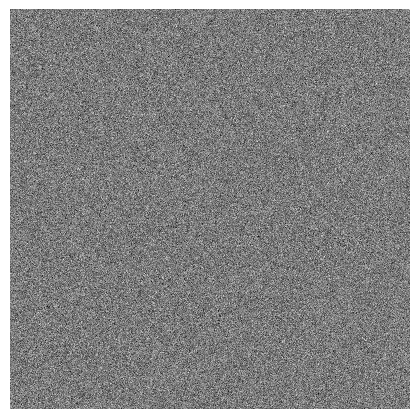

In [3]:
img = np.ones([1000, 1000]) * 2**12 / 2
img += np.random.normal(-0.025*img.mean(), 0.025*img.mean(), img.shape)
fcp.imshow(img, cmap='gray')

The histogram of this distribution is a bell-shape curve with some noise (see <a href=hist.html>here</a> for more details on `hist` plots):

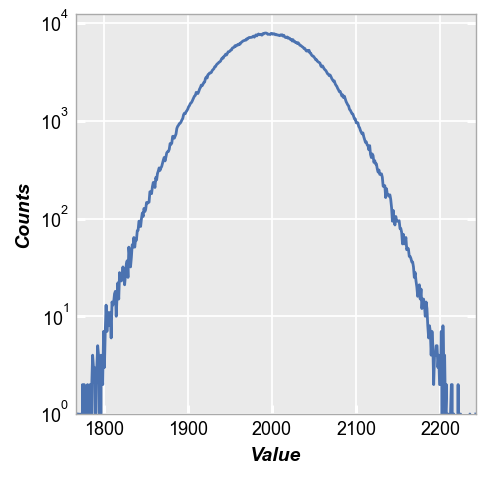

In [4]:
fcp.hist(img, **fcp.HIST)

We can recast these signal values as a normal quantile plot to get more insight into the distribution.  Observe that the result is very close to a straight line, except at the extreme values of sigma where the actual number of data points is quite low so the impact of random noise is more apparent. This result is expected because we applied a normal distribution of noise to the array data.

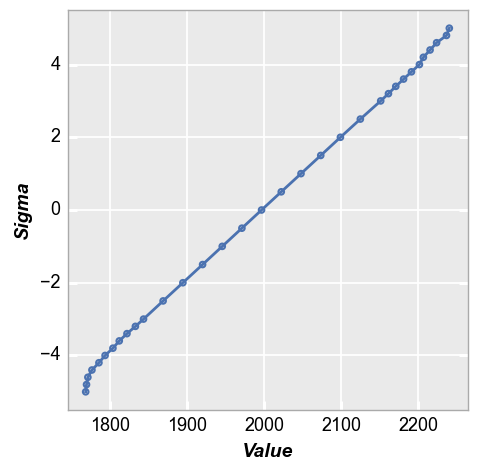

In [5]:
fcp.nq(img, marker_size=4, line_width=2)

### Outliers

Now consider the real-life situation where our dataset contains outliers that are not normally distributed.  Continuing with our image sensor example, these outliers are referred to as defect pixels.  We'll include both dark pixels (i.e., defect pixels that have low signal) and hot pixels (i.e., defect pixels with high signal) that are randomly placed outside of the normal distribution created above.  Think "salt and pepper" noise...

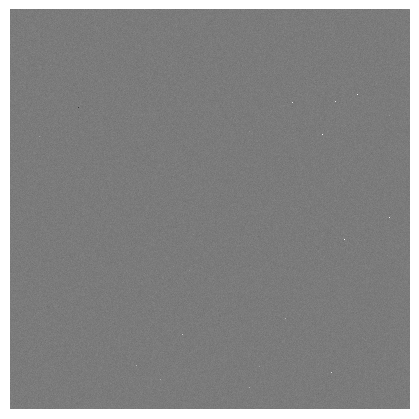

In [6]:
img2 = img.copy()

dark_pixel_qty = 10
dark_pixel_values = np.random.randint(0, img.min(), dark_pixel_qty)
for pixel in range(0, dark_pixel_qty):
    x, y = np.random.randint(0, 1000), np.random.randint(0, 1000)
    img2[x, y] = dark_pixel_values[pixel]
    
hot_pixel_qty = 120
hot_pixel_values = np.random.randint(img.max(), 2**12, hot_pixel_qty)
for pixel in range(0, hot_pixel_qty):
    x, y = np.random.randint(0, 1000), np.random.randint(0, 1000)
    img2[x, y] = hot_pixel_values[pixel]
    
fcp.imshow(img2, cmap='gray')

When we plot the histogram we can see the defect pixels, but because they are randomly dispersed the actual count of defect pixels is usually between 0-2 at any given signal value.  This makes it difficult to make any conclusions about these outliers based only on a histogram.

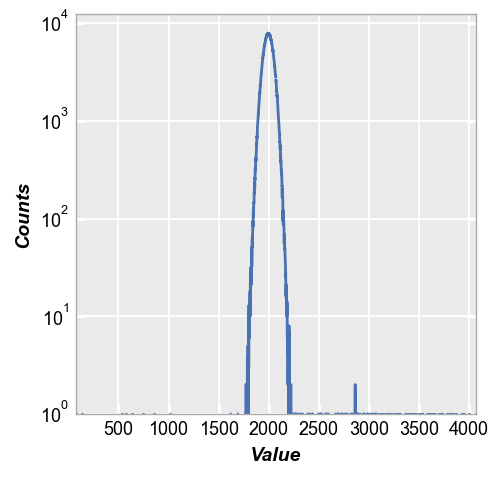

In [7]:
fcp.hist(img2, **fcp.HIST)

With the normal quantile plot, these outliers become extremely obvious and we clearly see how they deviate sharply from the normal distribution.  We can draw quantitative conclusions about the tails of the distribution that we could not make with only the histogram.

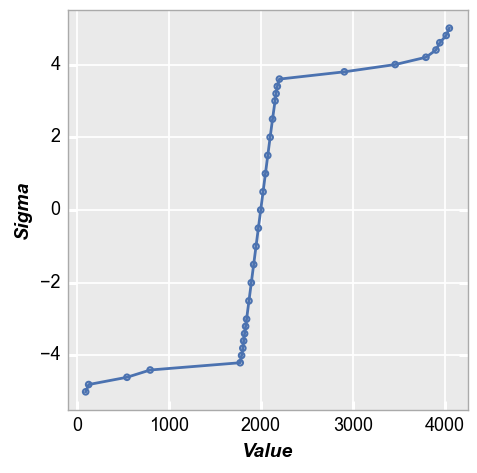

In [8]:
fcp.nq(img2, marker_size=4, line_width=2)

### Comparing distributions

Now we will demonstrate how the normal quantile plot allows us to better compare two distributions than simple histograms.  Let's create another image with a slightly different mean and noise profile and a different quantity (more than the last example) and range (lower than the last example) of defect pixels:

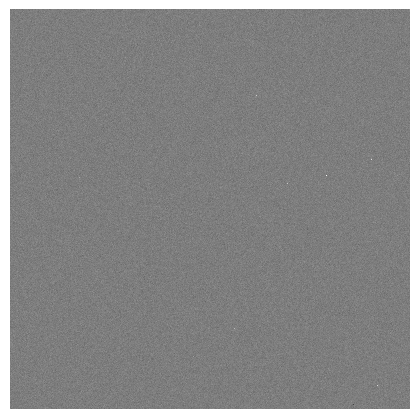

In [9]:
img3 = np.ones([1000, 1000]) * 2**12 / 2
img3 += np.random.normal(-0.035*img3.mean(), 0.035*img3.mean(), img.shape)

dark_pixel_qty2 = 20
dark_pixel_values = np.random.randint(500, img.min(), dark_pixel_qty2)
for pixel in range(0, dark_pixel_qty):
    x, y = np.random.randint(0, 1000), np.random.randint(0, 1000)
    img3[x, y] = dark_pixel_values[pixel]
    
hot_pixel_qty2 = 240
hot_pixel_values = np.random.randint(img.max(), 3500, hot_pixel_qty2)
for pixel in range(0, hot_pixel_qty):
    x, y = np.random.randint(0, 1000), np.random.randint(0, 1000)
    img3[x, y] = hot_pixel_values[pixel]
    
fcp.imshow(img3, cmap='gray')

Now we pack these two distributions in `DataFrames` with labels to easily use <b>fivecentplots</b> to overlay the datasets.  From the histogram overaly, we can see the distributions are different but it is quite difficult to draw comparisons of the defect pixel populations.

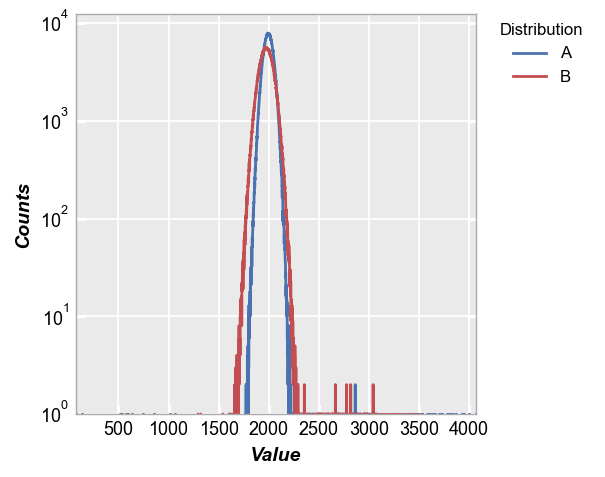

In [10]:
img2d = pd.DataFrame(img2)
img2d['Distribution'] = 'A'
img3d = pd.DataFrame(img3)
img3d['Distribution'] = 'B'
fcp.hist(pd.concat([img2d, img3d]), legend='Distribution', **fcp.HIST)

With the normal quantile plot, we can very clearly see the tail of the distributions from these two images is quite different and we can make quantitative conclusions about them.  We can also clearly see the difference in mean and the slope of curve around the mean (indicating different normal distribution standard deviation).  This is the power of the normal quantile plot.

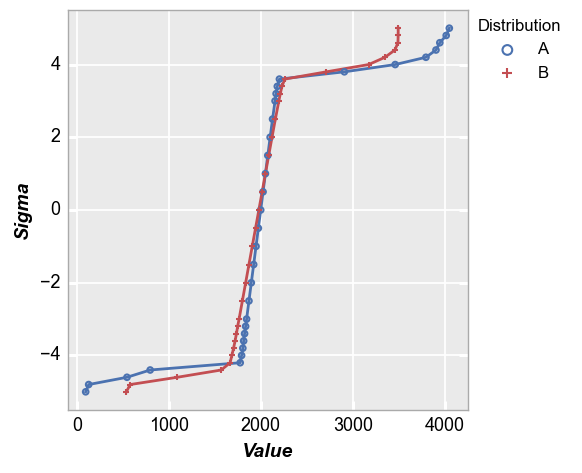

In [11]:
fcp.nq(pd.concat([img2d, img3d]), legend='Distribution', marker_size=4, line_width=2)

## 1D dataset

Now consider a basic 1D dummy dataset:

In [12]:
df = pd.read_csv(Path(fcp.__file__).parent / 'test_data/fake_data_box.csv')
df.head()

,Batch,Sample,Region,Value,ID
0,101,1,Alpha123,3.5,ID701223A
1,101,1,Alpha123,0.0,ID7700-1222B
2,101,1,Alpha123,3.3,ID701223A
3,101,1,Alpha123,3.2,ID7700-1222B
4,101,1,Alpha123,4.0,ID701223A


In this case, we need to supply the name of the `DataFrame` column containing the data to plot.  Because our dataset is relatively small, the `nq` plot is unable to calculate very large sigma values.

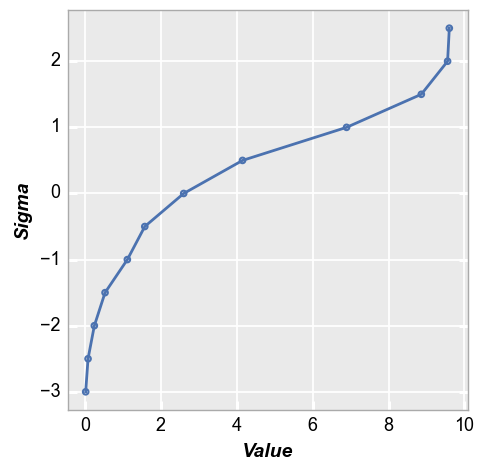

In [13]:
fcp.nq(df, x='Value', marker_size=4, line_width=2)

## Real image

Next we revisit the real image data of our favorite costumed kitten:

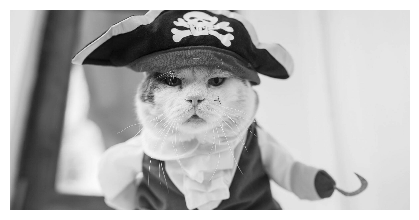

In [14]:
# Read an image
url = 'https://imagesvc.meredithcorp.io/v3/mm/image?q=85&c=sc&rect=0%2C214%2C2000%2C1214&poi=%5B920%2C546%5D&w=2000&h=1000&url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F47%2F2020%2F10%2F07%2Fcat-in-pirate-costume-380541532-2000.jpg'  # noqa
imgr = imageio.imread(url)

# Convert to grayscale
r, g, b = imgr[:, :, 0], imgr[:, :, 1], imgr[:, :, 2]
gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

# Convert image data to pandas DataFrame and scale to 12-bits
img_cat = pd.DataFrame(gray * 2**4)
fcp.imshow(img_cat, cmap='gray')

The `nq` plot quickly tells us that our distribution is not normal and we have significant tails in the distribution:

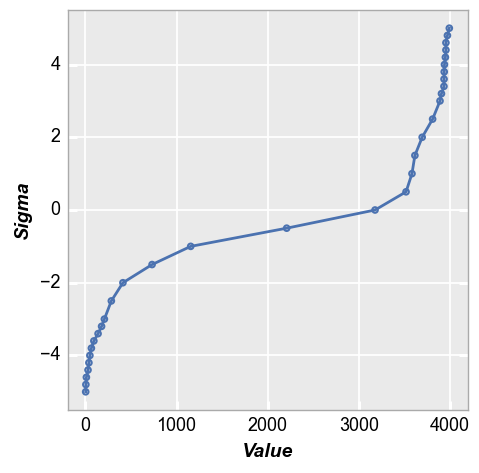

In [15]:
fcp.nq(img_cat, marker_size=4, line_width=2)

## nq calculation parameters

Because the `nq` plot requires multiple (potentially) costly computations of percentiles, this plot allows you to tailor the density of points near sigma=0 and the tails separately (see the top of this page for a description of all calculation parameters).

### Custom sigma range

Assume we want to ignore the tail of the distribution and just consider the +/- 2 sigma range.  This is done by passing the keyword `sigma`:

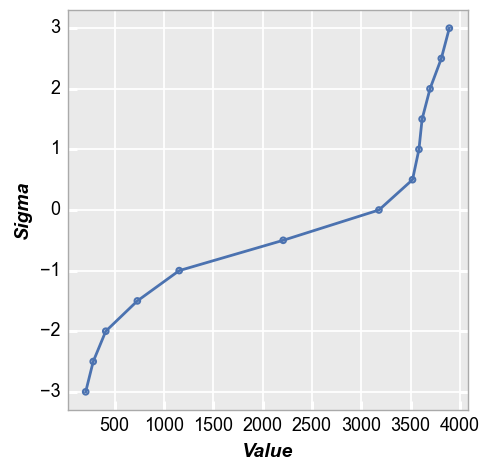

In [16]:
fcp.nq(img_cat, marker_size=4, line_width=2, sigma=3)

<div class="admonition note">
<p class="admonition-title"></p>
<p>Note there is currently nothing that prevents you from supplying a meaningless number for `sigma`.  For instance, if your dataset is small you may not have enough points to calculate +/-3 sigma accurately.  The auto-calculation of sigma will handle this, but there is no check on a custom `sigma` value</p>
</div>

### Custom tail

Now suppose you only consider +/-4 sigma to be the tail of your distribution.  You can change that using the keyword `tail`.  Notice the increased density of tail points now starts only at +/-4 sigma.

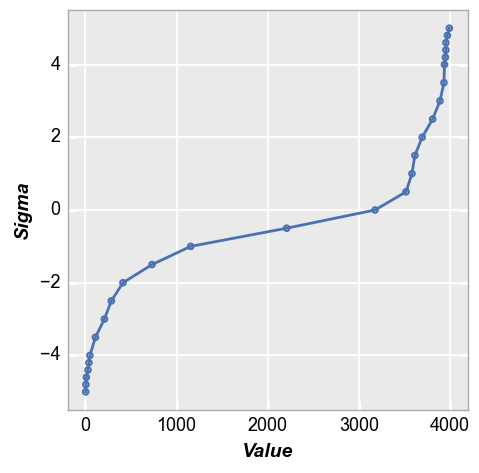

In [17]:
fcp.nq(img_cat, marker_size=4, line_width=2, tail=4)

### Point density

The sigma spacing between tail and non-tail points can be controlled separately using `step_tail` and `step_inner` keywords, respectively. Note that more points will slow the calculation time.

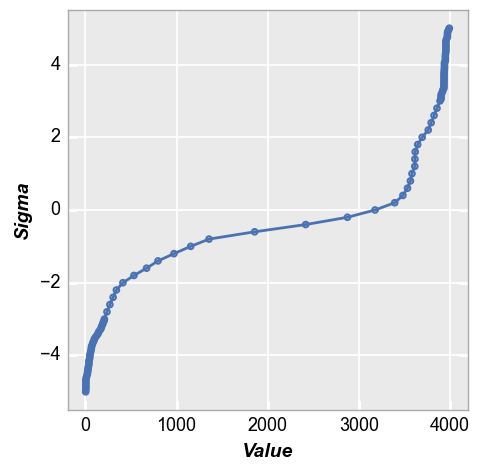

In [18]:
fcp.nq(img_cat, marker_size=4, line_width=2, step_inner=0.2, step_tail=0.05)

## Line fit

One convenient way to quantify a tail distribution is to consider how much it deviates from normality.  <b>fivecentplots</b> facilitates this analysis easily using the keyword `fit` and setting an appropriate fit range.  If we consider or image from above with a normal distribution and outlier pixels, we could fit a line from 0 to 1 sigma and see the delta between the expected normal distribution in the tail region vs the actual.  For this example a normal distribution would have a +4 sigma value of ~2200 vs the actual value of ~3700.  

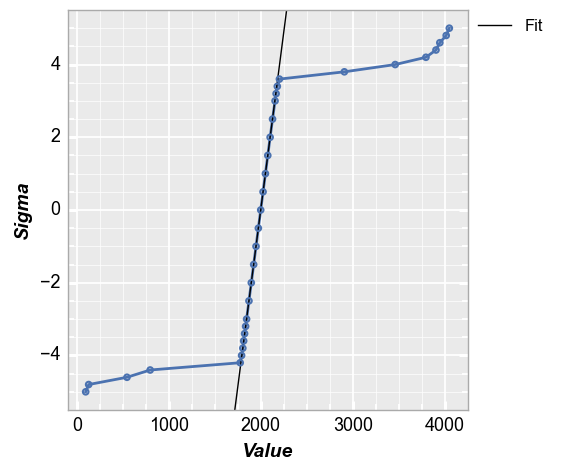

In [19]:
fcp.nq(img2d, marker_size=4, line_width=2, fit=True, fit_range_y=[0, 1], grid_minor=True)

## Styles

Style for `nq` plots follow the same rules as those of `xy` plots.  Please see <a href=styles.html>the style tutorial</a> and the <a href=plot.html>plot tutorial</a> for more details.  But a quick example could look like this:

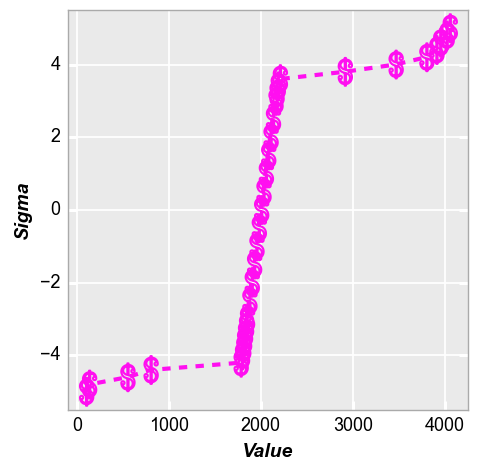

In [20]:
fcp.nq(img2d, markers=r'\$', marker_size=20, line_width=3, line_style='--', colors='#FF0FF0')

Don't ever style a plot like this